In [ ]:
!pip install vaderSentiment

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

df=pd.read_csv('/content/BestBuy_NodeXL_tweets_data_cleaned.csv') # change your csv file NAME HERE

# Ensure the Text column is of type string and handle NaN values
df['Text'] = df['Text'].fillna('').astype(str) # if your TEXT column is different name, CHANGE IT

# Define the function to get sentiment polarity using VADER
def get_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    # VADER returns a dictionary with scores, we'll use compound score for overall sentiment
    return sentiment_scores['compound']

# Apply the get_sentiment function to the Text column and create a new Sentiment column
df['Sentiment'] = df['Text'].apply(get_sentiment)

# Define a function to convert polarity score to sentiment category
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the categorize_sentiment function to the Sentiment column to create a new SentimentCategory column
df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

# Display the DataFrame with the new SentimentCategory column
# print(df.head())

# Count the number of each sentiment category
sentiment_counts = df['SentimentCategory'].value_counts()
num_positive_sentiments = sentiment_counts.get('positive', 0)
num_negative_sentiments = sentiment_counts.get('negative', 0)
num_neutral_sentiments = sentiment_counts.get('neutral', 0)

print("Number of positive sentiment tweets:", num_positive_sentiments)
print("Number of negative sentiment tweets:", num_negative_sentiments)
print("Number of neutral sentiment tweets:", num_neutral_sentiments)


df.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00
Number of positive sentiment tweets: 566
Number of negative sentiment tweets: 85
Number of neutral sentiment tweets: 217


,Vertex1,Vertex2,Type,Date,Text,Link,Likes,Quotes,Retweets,Comments,Sentiment,SentimentCategory
0,@BestBuy,https://twitter.com/BestBuy/status/15936502521...,Posted,"Nov 18, 2022 · 5:00 PM UTC",my best buy members get early access to great ...,https://twitter.com/BestBuy/status/15936502521...,214.0,62.0,72.0,3566.0,0.9118,positive
1,@BestBuy,https://twitter.com/BestBuy/status/15936200450...,Posted,"Nov 18, 2022 · 3:00 PM UTC",thumbs ready pokemon scarlet and pokemon viole...,https://twitter.com/BestBuy/status/15936200450...,122.0,8.0,30.0,454.0,0.3612,positive
2,@BestBuy,https://twitter.com/BestBuy/status/15933180580...,Posted,"Nov 17, 2022 · 7:00 PM UTC",artificial intelligence can be used to describ...,https://twitter.com/BestBuy/status/15933180580...,109.0,8.0,37.0,286.0,0.7096,positive
3,@BestBuy,https://twitter.com/BestBuy/status/15932727559...,Posted,"Nov 17, 2022 · 4:00 PM UTC",what do you get the person who needs help with...,https://twitter.com/BestBuy/status/15932727559...,76.0,7.0,23.0,281.0,0.4019,positive
4,@BestBuy,https://twitter.com/BestBuy/status/15929858647...,Posted,"Nov 16, 2022 · 9:00 PM UTC",best buy home expert justin shows how to give ...,https://twitter.com/BestBuy/status/15929858647...,60.0,3.0,18.0,125.0,0.6369,positive


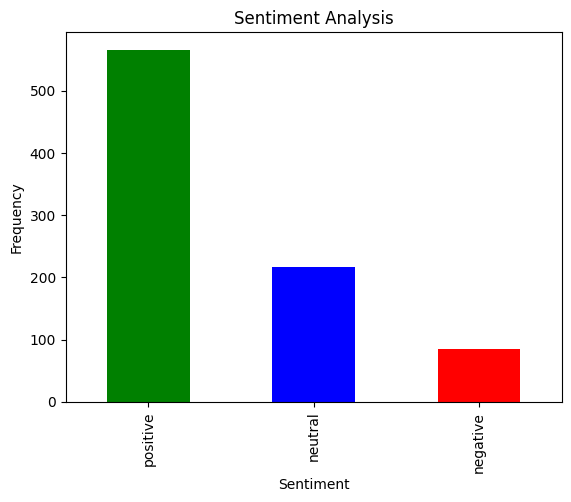

In [ ]:
import matplotlib.pyplot as plt

# Count frequency of each sentiment
sentiment_counts = df['SentimentCategory'].value_counts()

# Define colors for each sentiment category
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}

# Plot the bar chart with specified colors
sentiment_counts.plot(kind='bar', color=[colors.get(x, 'black') for x in sentiment_counts.index])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()
